## Why tensorflow
- Write fast deep learning code in python (able to run on a GPU)
- Able to access many pre-built deep learning models
- Whole stack: preprocess, model, deploy
- Originally designed and used in-house by Google (now open-source)

## What is transfer learning? Why use transfer learning?
- Take what you knoe in one domain and apply it to another
- Starting from scratch can be expensive and time consuming.
- Wht not take advantage of what's already out there ?

## A TensorFLow workflow
1. Get data ready (turn into Tensors)
2. Pick a model (to suit your problem)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

## Concepts Learnt
- An end-to-end multi-class classification workflow with TensorFlow
- Preprocessing image data (getting it into Tensors)
- Choosing a deep learning model 
- Fitting a model to the data (learning patterns)
- Making predictions with a model (using patterns)
- Evaluating model predictions
- Saving and loading models
- Using a trained model to make predictions on custom data.

# End to end Multi-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classification using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:

- We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
- There are 120 breeds of dogs (this means there are 120 different classes).
- There are around 10,000+ images in the training set (these images have labels).
- There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [2]:
# Importing tensorflow modules
import tensorflow as tf
print("TF version:",tf.__version__)

TF version: 2.9.1


In [3]:
# Import tensorflow hub
import tensorflow_hub as hub
print("TF hub version:",hub.__version__)

TF hub version: 0.12.0


# Get our workspace ready
- Import TensorFlow 2.x
- Import TensorFlow Hub
- Make sure you have a GPU

In [4]:
# Import other modules
import pandas as pd
import numpy as np

## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representation).

Let's start by accessing our data and checking our lables.

In [5]:
# Checkout the lables of our data
import pandas as pd
label_csv = pd.read_csv("../datasets/dog-breed-identification/labels.csv")
print(label_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [6]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


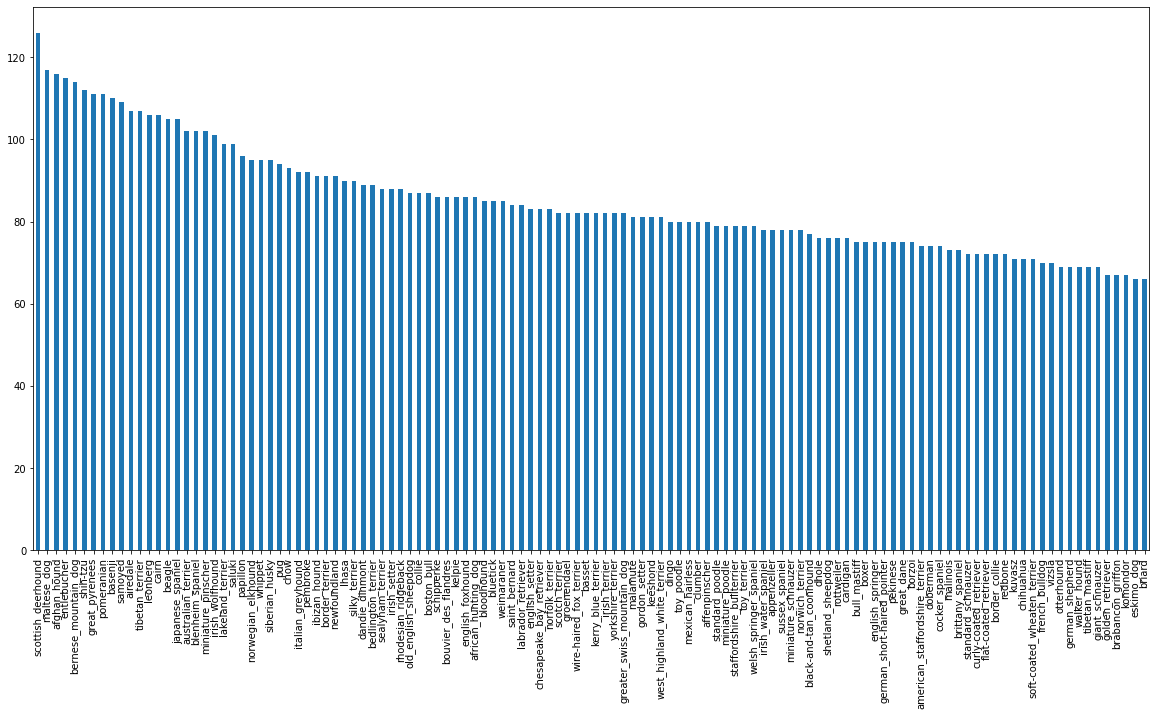

In [7]:
# How many images are there of each breed?
label_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [8]:
label_csv["breed"].value_counts().median()

82.0

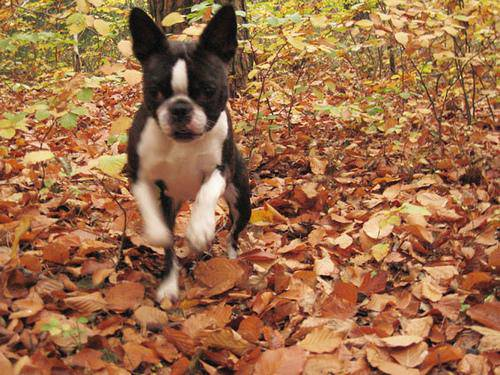

In [9]:
# Lets view an image
from IPython.display import Image
Image("../datasets/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their lables

Lets get list of all of our image file pathnames.

In [10]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
# Create pathnames from image ID's
filenames = ["../datasets/dog-breed-identification/train/" + fname + ".jpg" for fname in label_csv["id"]]

# Check the first 10
filenames[:10]

['../datasets/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../datasets/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../datasets/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../datasets/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../datasets/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../datasets/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../datasets/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../datasets/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../datasets/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../datasets/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
label_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [13]:
import numpy as np
labels = label_csv["breed"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data dictonary")

Number of labels matches number of filenames!


In [16]:
label_csv["breed"][9000]

'tibetan_mastiff'

In [17]:
import numpy as np
labels = label_csv["breed"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [20]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [21]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
len(boolean_labels)

10222

In [23]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [26]:
filenames[:10]

['../datasets/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../datasets/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../datasets/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../datasets/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../datasets/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../datasets/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../datasets/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../datasets/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../datasets/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../datasets/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [27]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [28]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

In [29]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [31]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [32]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['../datasets/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '../datasets/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '../datasets/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '../datasets/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '../datasets/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False

## Preprocessing Images (turning images into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image
7. Before we do, let's see what importing an image looks like.

In [33]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape


(257, 350, 3)

In [34]:
image.max(), image.min()

(255, 0)

In [35]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [36]:
# turn image into a tensor
tf.constant(image)[:2]

2022-07-23 14:17:42.140070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

We'll create a function to:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

In [37]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path,image_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor
    """
    # Read in an image file
    image = tf.io.read_file(image_path)
    
    # Turn the jpeg image into numeric Tensor with 3 colour channels (Read,Greed,Blue)
    image = tf.image.decode_jpeg(image,channels=3)
    
    # Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image,tf.float32)
    
    # Resize the image to our desired value (224,224)
    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
    
    return image;

# Turning our data into batches

why turn our data into batches?

Lets say your trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (batch size) images at a time (you can manually adjust the batch size as you need to be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this:
`(image,label)`

In [38]:
# Create a simple function to return a tuple (image,label)
def get_image_label(image_path,label):
    """
    Takes an image file path name and the assosiated label,
    processes the image and retuens a tuple of (image,label).
    """
    image = process_image(image_path)
    return image,label
    

In [39]:
(process_image(X[42],y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Now we've got a way to tuen our data into tuples of Tensors in the form: `(image,label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [40]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X,y=None,bath_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Creates batches of data out of image(X) and label (y) pairs.
    Shuffles the data if it's training data
    Also accepts test data as input (no labels).
    """
    # If the data is a test dataset, we probably  don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    # If the data is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),# Fill file paths
                                                  tf.constant(y))) # Labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
    
        # Create (image,label) tules (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)
    
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch
    

In [41]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [42]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [53]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    
    """
      Displays a plot of 25 images and their labels from a data batch.
    """
  # Setup the figure
    plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
    for i in range(25):
        
    # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
    # Display an image 
        plt.imshow(images[i])
    # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
        plt.axis("off")

In [48]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

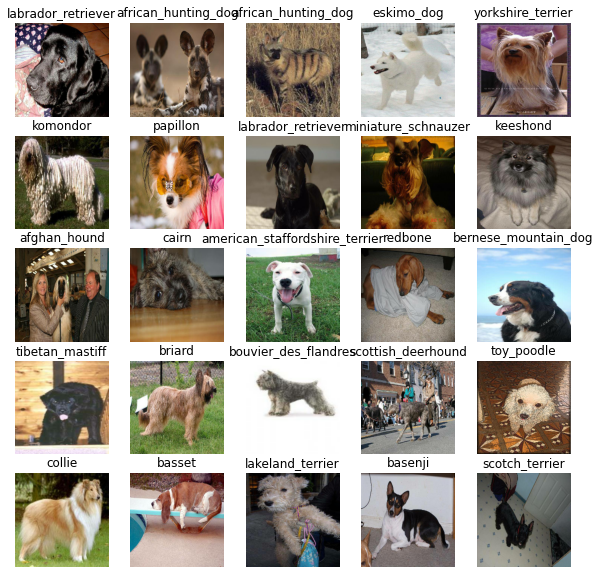

In [54]:
# # Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

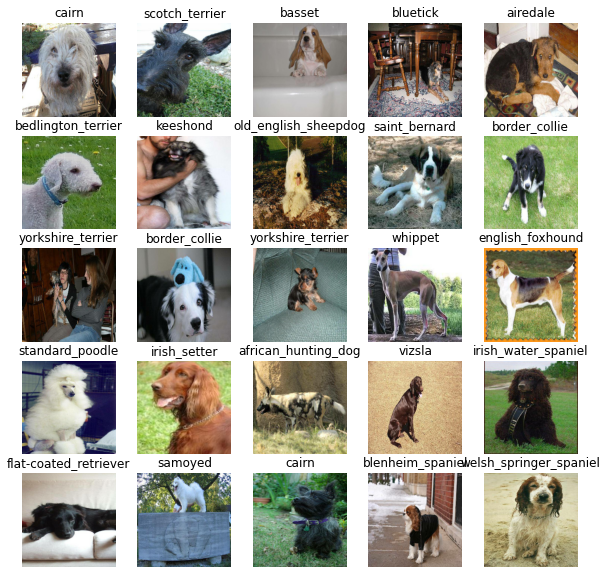

In [55]:
# Now let's visialize the data in a training batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building our model

Before we build a model, there are a few things we need to define:
* The input shape (our image, in the form of Tensors)  to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [59]:
# Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] # batchm height, width, colour channels

# Setup outpt shape of our mode
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now we've got out input, outputs and model ready to go.
Lets put them together into keras deep learning model!

Knowing this, let's crrate a function which:
* Takes the input shape, output shape and the model we've choosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaludated and improves).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model



In [60]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:",MODEL_URL)
    
    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 input layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation="softmax") # Layer 2 output layer
    ])
    
    #Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [61]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
